##  텍스트 데이터의 시각화 1

> 사용되는 패키지
+ tm
+ wordcloud
+ RColorBrewer
+ SnowballC
---------------------------------------------
> 패키지 설치 시행착오 
1. conda install -c r r-tm  **실패**
2. conda install -c r r-SnowballC **실패**
3. 그래서 아래 명령어를 통해서 직접 CRAN에서 다운받아서 설치를 했음
   - install.packages('SnowballC',repos="http://cran.us.r-project.org",lib="C:/Anaconda2/R/library")
  

In [10]:
install.packages('tau',repos='http://cran.us.r-project.org',lib="C:/Anaconda2/R/library")

package 'tau' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\mcm79\AppData\Local\Temp\RtmpGkrKdx\downloaded_packages


In [2]:
detach_package <- function(pkg, character.only = FALSE){
    if(!character.only){
        pkg <- deparse(substitute(pkg))
    }
    
    search_item <- paste("package", pkg, sep = ":")
    
    while(search_item %in% search()){
        detach(search_item, unload = TRUE, character.only = TRUE)
    }
}

In [7]:
detach_package("RColorBrewer", TRUE)

ERROR: Error: package 'RColorBrewer' is required by 'wordcloud' so will not be detached


In [4]:
.libPaths()

[1] "C:/Users/mcm79/Documents/R/win-library/3.3"
[2] "C:/Anaconda2/R/library"

In [11]:
library(tm)
library(SnowballC)
library(wordcloud)
library(KoNLP)

Loading required package: tau
Loading required package: Sejong
Successfully Loaded Sejong Package.
Checking user defined dictionary!


Attaching package: 'KoNLP'

The following object is masked from 'package:tau':

    is.ascii



In [12]:
mytext <- Corpus(DirSource("C:\\Users\\mcm79\\R_bio\\R_시각화\\eng_text"))
inspect(mytext)

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 1

[[1]]
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 3928



<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 1

[[1]]
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 3147



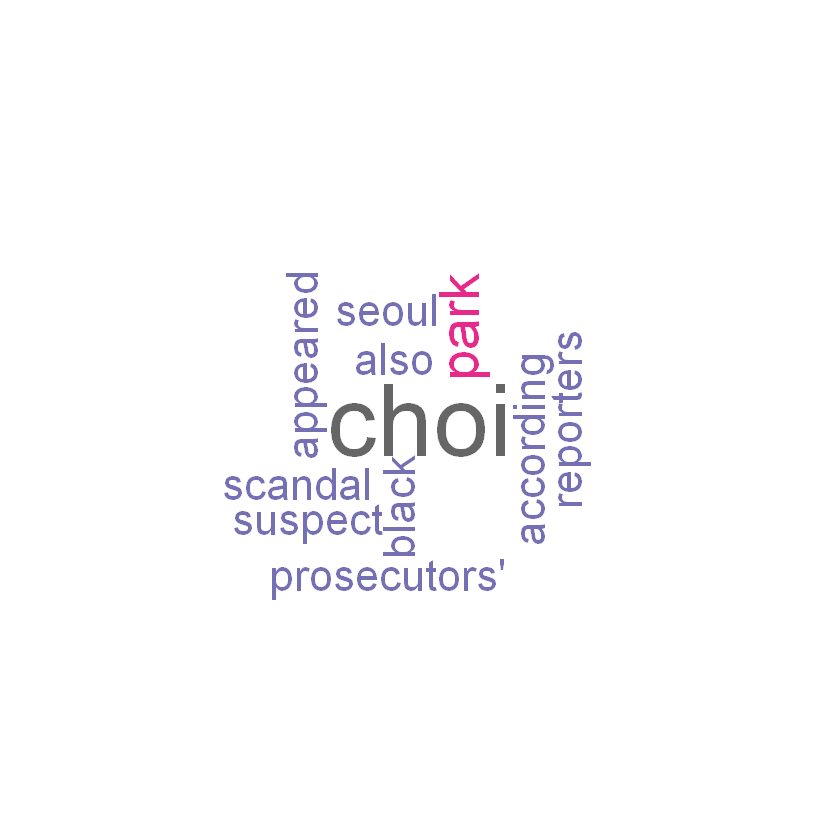

In [12]:
mytext <- tm_map(mytext,tolower)
mytext <- tm_map(mytext, removeWords,stopwords("english"))
mytext <- tm_map(mytext, stemDocument)
mytext <- tm_map(mytext, PlainTextDocument)
inspect(mytext)
wordcloud(mytext,scale=c(5,0.5), max.words=100, random.order=FALSE, rot.per=0.35, use.r.layout=FALSE, colors =brewer.pal(8,"Dark2"))

In [15]:
mytext <- tm_map(mytext, removeWords,c("according","can"))

# 한글문서의 워드 클라우드

In [25]:
ktext <- Corpus(DirSource("C:\\Users\\mcm79\\R_bio\\R_시각화\\kor_text"))

In [27]:
words <- unlist(sapply(ktext[[1]]$content, extractNoun, USE.NAMES=FALSE))
words


[1] "더불어민주당"   "조응"           "천"             "의원"          
  [5] "1"              "\"당·정·청"   "곳곳"           "최순실씨에게"  
  [9] "아부"           "협조"           "'최순실"        "라인"          
 [13] "십상"           "시"             "말"             "조"            
 [17] "의원"           "이"             "날"             "국회"          
 [21] "민주"           "당"             "'박근혜-최순실" "게이트"        
 [25] "국민"           "조사"           "위"             "회의"          
 [29] "주권자"         "국민"           "배신"           "국가"          
 [33] "조직"           "사리사욕"       "사악"           "한"            
 [37] "무리"           "죄"             "합당"           "한"            
 [41] "벌"             "면"             "이"             "말"            
 [45] "박근혜"         "정부"           "청와대"         "공직기강"      
 [49] "비서관"         "'정윤회"        "문건"           "유출"          
 [53] "관련"           "해"             "기소"           "무죄"          
 [57] "조"             "의원"           "'최순실"        "게이트"        
 [61] "국면"           "말"             "조"             "의원"          
 [65] "\"청와대"       "최재경"         "민정수석"       "검찰"          
 [69] "지휘"           "지"             "중요"           "공직사회"      
 [73] "공기업"         "금융계"         "대기업"         "암"            
 [77] "존재"           "민정수석"       "처리"           "것"            
 [81] "강조"           "문고리"         "3인방"          "중"            
 [85] "정호성"         "전"             "비서관"         "18"            
 [89] "년"             "박근혜"         "대통령"         "안봉근·이재만"
 [93] "전"             "비서관"         "압수수색"       "것"            
 [97] "끝"             "주시"           "것"             "경고"          
[101] "\"최"           "벙거지"         "덮어쓰고"       "검찰청사"      
[105] "관심"           "최"             "씨"             "집중"          
[109] "시"             "김기춘"         "전"             "대통령"        
[113] "비서실장"       "상황"           "장악하"         "대응책"        
[117] "마련"           "이야기"         "주장"           "조"            
[121] "의원"           "김"             "전"             "실장"          
[125] "정부"           "출범"           "첫"             "해"            
[129] "2013"           "년"             "8"              "월"            
[133] "초순"           "최"             "씨"             "빌딩"          
[137] "7∼8층을"       "사무실"         "정권"           "초"            
[141] "프레임"         "언론보도"       "면"             "분"            
[145] "막후"           "총괄"           "기획"           "게이트"        
[149] "진상"           "리"             "말"             "이"            
[153] "조"             "의원"           "\"청와대"       "우병우"        
[157] "전"             "민정수석"       "사건"           "어떠냐"        
[161] "세상"           "전"             "수석"           "아들"          
[165] "의경"           "검찰"           "소환"           "수차례"        
[169] "불응"           "갑질도"         "갑질"           "배우자"        
[173] "조사"           "거부"           "우병우"         "직후"          
[177] "조사"           "면"             "오만방자"       "하기"          
[181] "짝"             "검찰"           "전"             "수석"          
[185] "재물"           "것"             "이"             "임기"          
[189] "말"             "검찰"           "예정"           "행태"          
[193] "주장"           "권력"           "순종"           "자세"          
[197] "사건"           "왜곡"           "국민"           "질타"          
[201] "권력"           "힘"             "듯"             "권력"          
[205] "모습"           "수사권"         "기소"           "권"            
[209] "독점"           "하기"           "눈속임"         "정권"          
[213] "반복"           "눈속임"         "속"             "국민"          
[217] "비판"

In [29]:
wordfreq <- table(words)
wordfreq

words
'박근혜-최순실        '정윤회        '최순실    "당·정·청        "청와대 
             1              1              2              1              2 
           "최              1             18           2013          3인방 
             1              1              1              1              1 
      7∼8층을              8           갑질         갑질도           강조 
             1              1              1              1              1 
          거부           검찰       검찰청사             것         게이트 
             1              4              1              4              3 
          경고           곳곳         공기업       공직기강       공직사회 
             1              1              1              1              1 
          관련           관심           국가           국면           국민 
             1              1              1              1              4 
          국회             권           권력         금융계           기소 
             1              1              3              1              2 
          

In [30]:
sort(wordfreq,decreasing=T)[1:12]

words
      전     의원       말       조     검찰       것     국민       이 
       7        6        5        5        4        4        4        4 
  게이트     권력       면 민정수석 
       3        3        3        3 

Warning message:
In strwidth(words[i], cex = size[i], ...): conversion failure on '硫<b4>' in 'mbcsToSbcs': dot substituted for <eb>Warning message:
In strwidth(words[i], cex = size[i], ...): conversion failure on '硫<b4>' in 'mbcsToSbcs': dot substituted for <a9>Warning message:
In strwidth(words[i], cex = size[i], ...): conversion failure on '硫<b4>' in 'mbcsToSbcs': dot substituted for <b4>Warning message:
In text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * : conversion failure on '硫<b4>' in 'mbcsToSbcs': dot substituted for <eb>Warning message:
In text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * : conversion failure on '硫<b4>' in 'mbcsToSbcs': dot substituted for <a9>Warning message:
In text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * : conversion failure on '硫<b4>' in 'mbcsToSbcs': dot substituted for <b4>Warning message:
In text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * : 유니코드 문자 U+

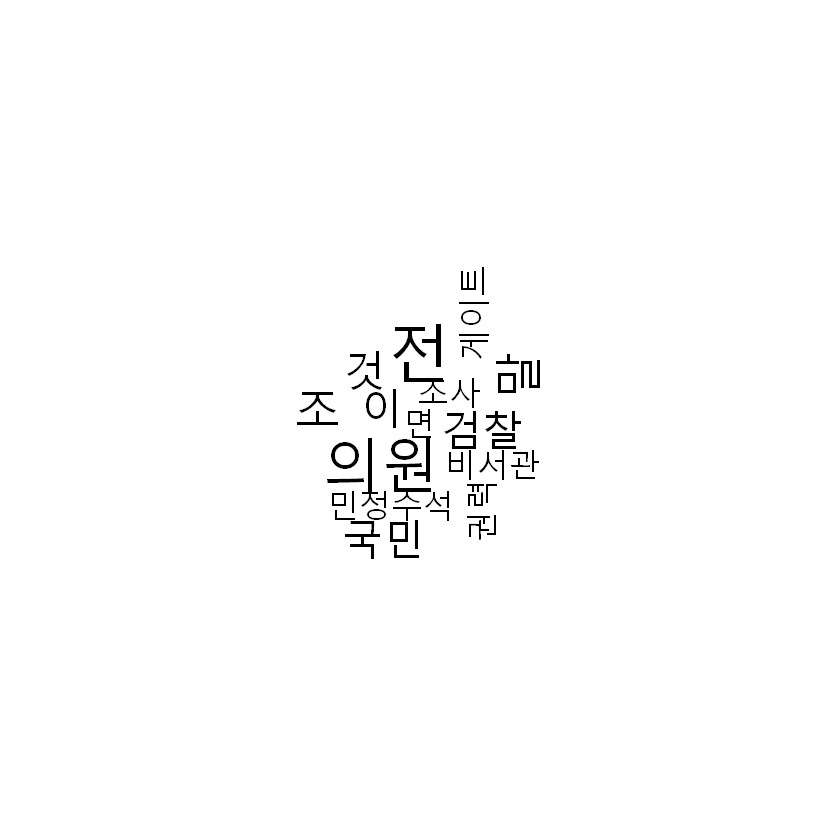

In [31]:
wordcloud(names(wordfreq), freq=wordfreq, max.words=50)

Warning message:
In strwidth(words[i], cex = size[i], ...): conversion failure on '留<90>' in 'mbcsToSbcs': dot substituted for <eb>Warning message:
In strwidth(words[i], cex = size[i], ...): conversion failure on '留<90>' in 'mbcsToSbcs': dot substituted for <a7>Warning message:
In strwidth(words[i], cex = size[i], ...): conversion failure on '留<90>' in 'mbcsToSbcs': dot substituted for <90>Warning message:
In text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * : conversion failure on '留<90>' in 'mbcsToSbcs': dot substituted for <eb>Warning message:
In text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * : conversion failure on '留<90>' in 'mbcsToSbcs': dot substituted for <a7>Warning message:
In text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * : conversion failure on '留<90>' in 'mbcsToSbcs': dot substituted for <90>Warning message:
In text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * : 유니코드 문자 U+

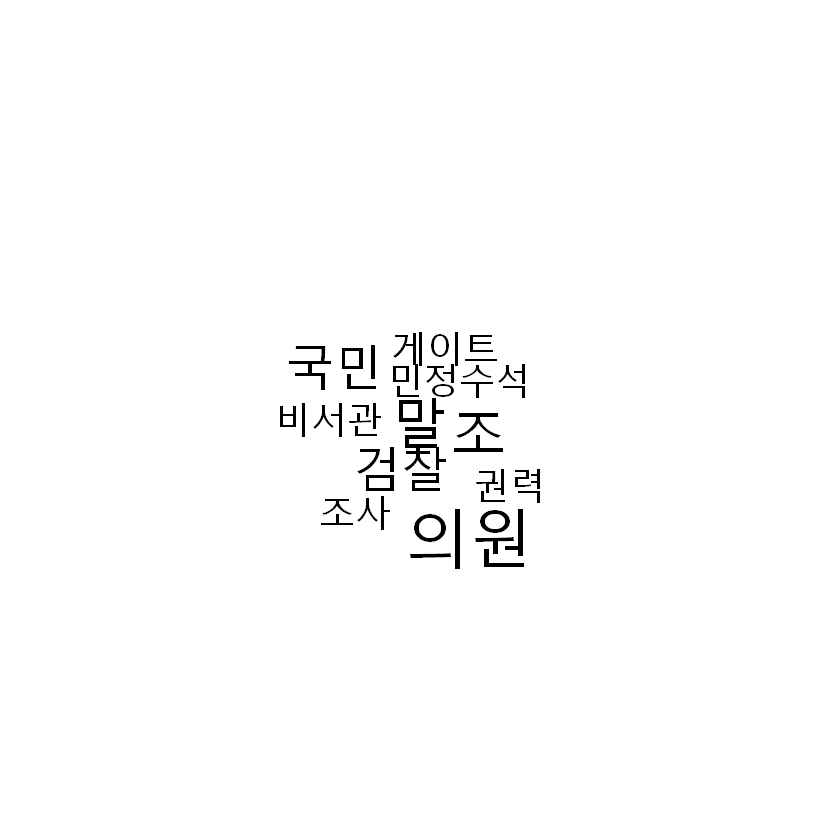

In [33]:
wordfreq <- wordfreq[!(names(wordfreq) %in% c("면","전","것","이"))]
wordcloud(names(wordfreq), freq=wordfreq, max.words=50)